Creating a program function that can answer the following questions from CH. 7 in the Handbook of Quantitative Ecology.

- Questions are:
    - Probability we will find 2 eggs in the 1st nest we check?
    - Probability team will get 3 nest in a row with 1 egg?
    - Average number of eggs per nest?

- Finally be able toadjust the input parameters.
    - Such as how many nest with 1, 2, or 3 eggs
    - how many nest in a row with 1 egg

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import scipy.stats as stats
import numpy as np


In [3]:
#Creating a function to predict the probability of finding 4 nests with one egg, 14 nests with two eggs,
# and 2 nests with three eggs. What is the probability that the camera team will find two or more 
# eggs in the first nest that it examines? What is the probability that the team will look at 
# three nests in a row and find only one egg in each? What is the average number of eggs per nest 
# of this eagle species?


def eagle_nest_probabilities(n1, n2, n3, n1row):
    """
    Function that calculates and returns the following answers printed:
    1. Probability we will find 2 eggs in 1st nest
    2. Probability we will get N nest in a eoq with 1 egg
    3. Average number of eggs per nest

    Parameters:
    n1 (int): Number of nest with 1 egg 
    n2 (int): Number of nest with 2 egg
    n3 (int): Number of nest with 3 egg 
    n1row (int): Number of nest in a row with 1 egg 

    Returns:
    Probability of p_two_or_more, p_one_in_three, average_eggs
    """


    # Calculate the total number of nests
    total_nests = n1 + n2 + n3

    # Calculate the probabilities
    p_two_or_more = 1 - (stats.poisson.pmf(0, n1) + stats.poisson.pmf(1, n1))
    p_one_in_three = (stats.poisson.pmf(1, n1) ** 3)
    average_eggs = (1 * n1 + 2 * n2 + 3 * n3) / total_nests

    return p_two_or_more, p_one_in_three, average_eggs

# Example usage
n1 = 4  # nests with one egg
n2 = 14 # nests with two eggs
n3 = 2  # nests with three eggs
n1row = 3 # nests in a row with one egg
probabilities = eagle_nest_probabilities(n1, n2, n3, n1row)
print("Probability of finding two or more eggs in the first nest:", round(probabilities[0] *100,2),"%")
print("Probability of finding one egg in three nests in a row:", round(probabilities[1] *100,2),"%")
print("Average number of eggs per nest:", probabilities[2])


Probability of finding two or more eggs in the first nest: 90.84 %
Probability of finding one egg in three nests in a row: 0.04 %
Average number of eggs per nest: 1.9


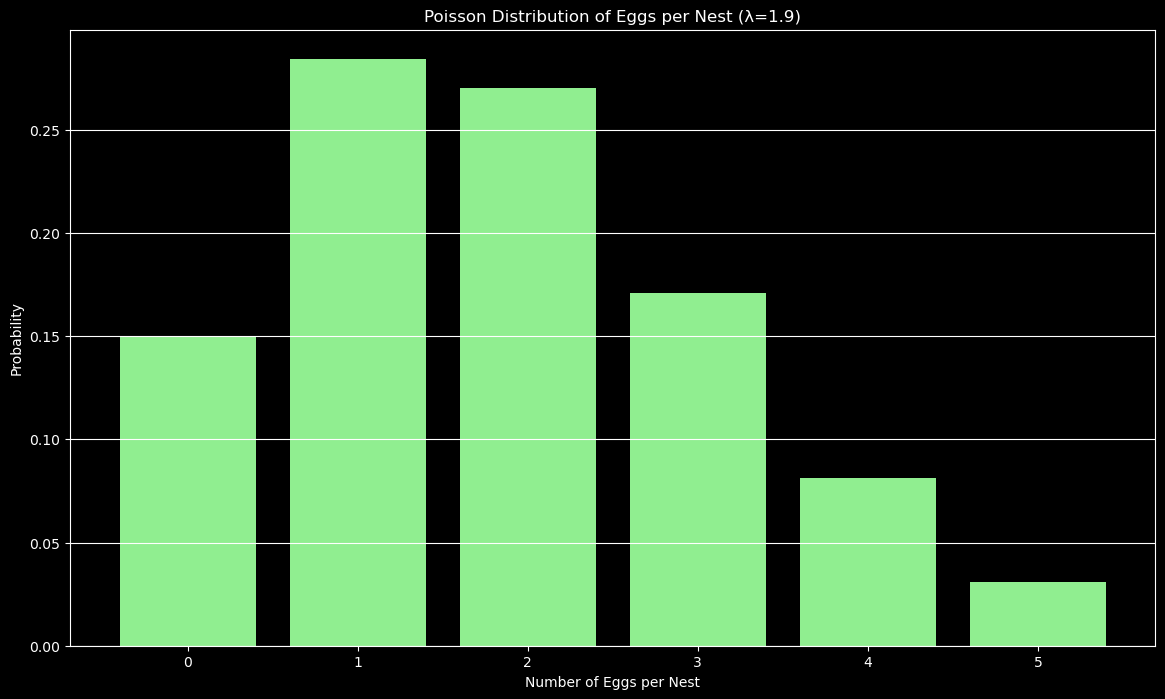

In [12]:
#Creating a function to plot the Poisson distribution for the number of eggs per nest
def plot_poisson_distribution(lam, max_eggs):
    x = np.arange(0, max_eggs + 1)
    poisson_pmf = stats.poisson.pmf(x, lam)

    plt.figure(figsize = (14,8))
    plt.bar(x, poisson_pmf, color='lightgreen')
    style.use('dark_background')
    plt.xlabel('Number of Eggs per Nest')
    plt.ylabel('Probability')
    plt.title('Poisson Distribution of Eggs per Nest (λ={})'.format(lam))
    plt.xticks(x)
    plt.grid(axis='y')
    plt.show()
# Example usage
lam = 1.9  # average number of eggs per nest
max_eggs = 5  # maximum number of eggs to display
plot_poisson_distribution(lam, max_eggs)